<a href="https://colab.research.google.com/github/emmayeh-0211/2021AI_ml/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千

In [35]:
# DataFrame：表格. Series：一行/一列
df = pd.DataFrame(boston['data'],
                  columns=boston['feature_names'])
df['ans'] = boston['target']
df.to_csv('boston.csv', encoding='utf-8', index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [36]:
# sklearn前：pandas.DataFrame
# sklearn後：np.array
import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(df.drop(['ans'], axis=1)), np.array(df['ans'])
# 90% x, 10% x, 90% y, 10% y）
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(455, 13)
(51, 13)
(455,)
(51,)


In [37]:
# 使用決策樹這個演算法訓練模型
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5) # 創造模型
                                          # 可以透過設定模型深度，來預防過擬合的情形產生
reg.fit(x_train, y_train) # 餵資料給模型

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(297.26785714285717, 498.3, 'RM <= 6.941\nmse = 84.499\nsamples = 455\nvalue = 22.701'),
 Text(126.21428571428572, 407.70000000000005, 'LSTAT <= 14.4\nmse = 40.921\nsamples = 386\nvalue = 20.108'),
 Text(39.85714285714286, 317.1, 'DIS <= 1.385\nmse = 27.317\nsamples = 234\nvalue = 23.372'),
 Text(26.571428571428573, 226.5, 'mse = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(53.142857142857146, 226.5, 'RM <= 6.543\nmse = 15.246\nsamples = 230\nvalue = 22.909'),
 Text(26.571428571428573, 135.89999999999998, 'LSTAT <= 7.62\nmse = 8.471\nsamples = 180\nvalue = 21.607'),
 Text(13.285714285714286, 45.299999999999955, 'mse = 2.408\nsamples = 40\nvalue = 23.945'),
 Text(39.85714285714286, 45.299999999999955, 'mse = 8.195\nsamples = 140\nvalue = 20.939'),
 Text(79.71428571428572, 135.89999999999998, 'LSTAT <= 4.915\nmse = 11.564\nsamples = 50\nvalue = 27.596'),
 Text(66.42857142857143, 45.299999999999955, 'mse = 3.579\nsamples = 13\nvalue = 30.931'),
 Text(93.0, 45.299999999999955, 'mse = 9.089

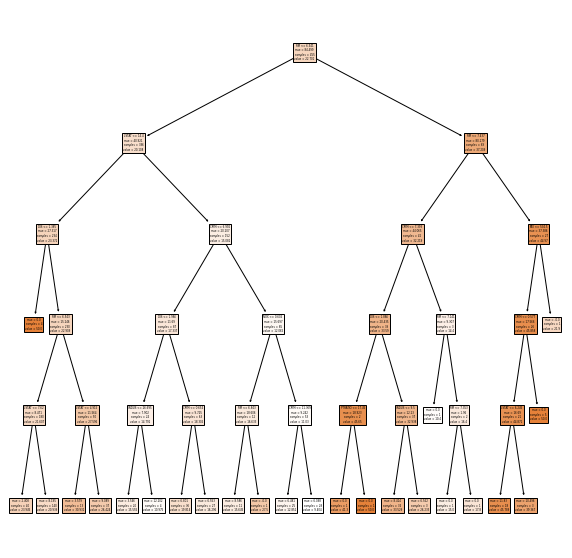

In [38]:
# 把模型結果畫出來
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(reg, 
          feature_names=boston["feature_names"],
          filled=True)

# mse = 84.195 samples = 455 value = 22.483' 各自代表的意思
# mse 均方差 跟平均的平均距離
# samples 分類的數量 
# values 為 samples的平均

In [39]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.7785390248524102